# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
# set styling
plt.style.use('fivethirtyeight')
sns.set_palette('deep')

## Data Overview

In [ ]:
# load data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [5]:
# overview statistics
print(f"Training data: {train.shape}")
print(f"Test data:, {test.shape}")

Training data: (1460, 81)
Test data:, (1459, 80)


In [6]:
# data types and non-null counts
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# statistical summary
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
# categorical variables summary
train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


## Target Variable Analysis

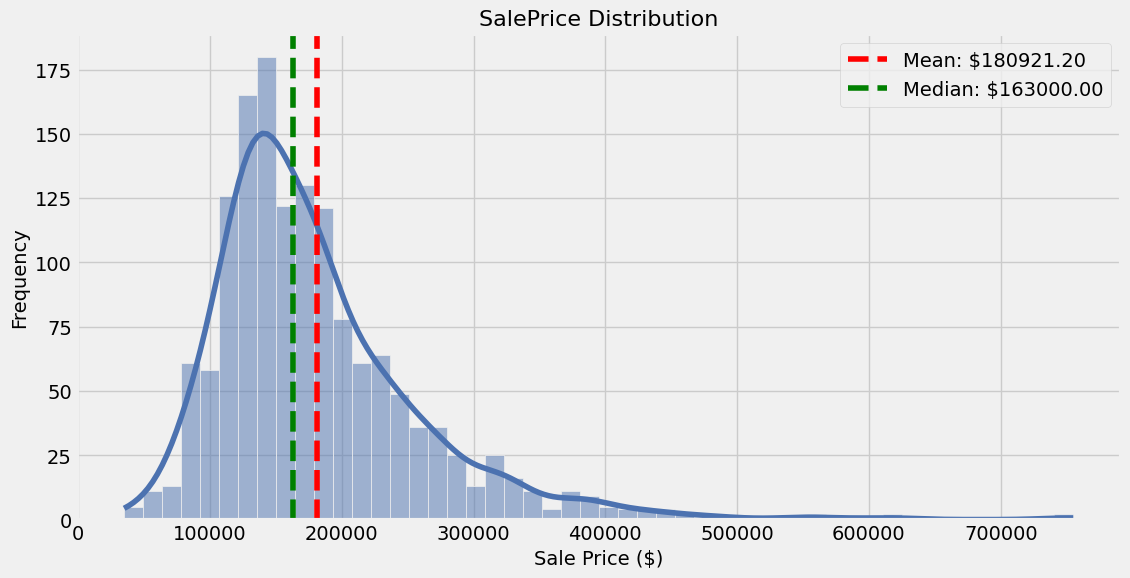

In [9]:
# SalePrice distribution
plt.figure(figsize=(12, 6))
sns.histplot(train['SalePrice'], kde=True, bins=50)
plt.title('SalePrice Distribution', fontsize=16)
plt.xlabel('Sale Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(train['SalePrice'].mean(), color='r', linestyle='--', label=f'Mean: ${train["SalePrice"].mean():.2f}')
plt.axvline(train['SalePrice'].median(), color='g', linestyle='--', label=f'Median: ${train["SalePrice"].median():.2f}')
plt.legend()
plt.show()

In [10]:
# check for skewness
print(f"SalePrice skewness: {train['SalePrice'].skew()}")
print(f"SalePrice kurtosis: {train['SalePrice'].kurtosis()}")

SalePrice skewness: 1.8828757597682129
SalePrice kurtosis: 6.536281860064529


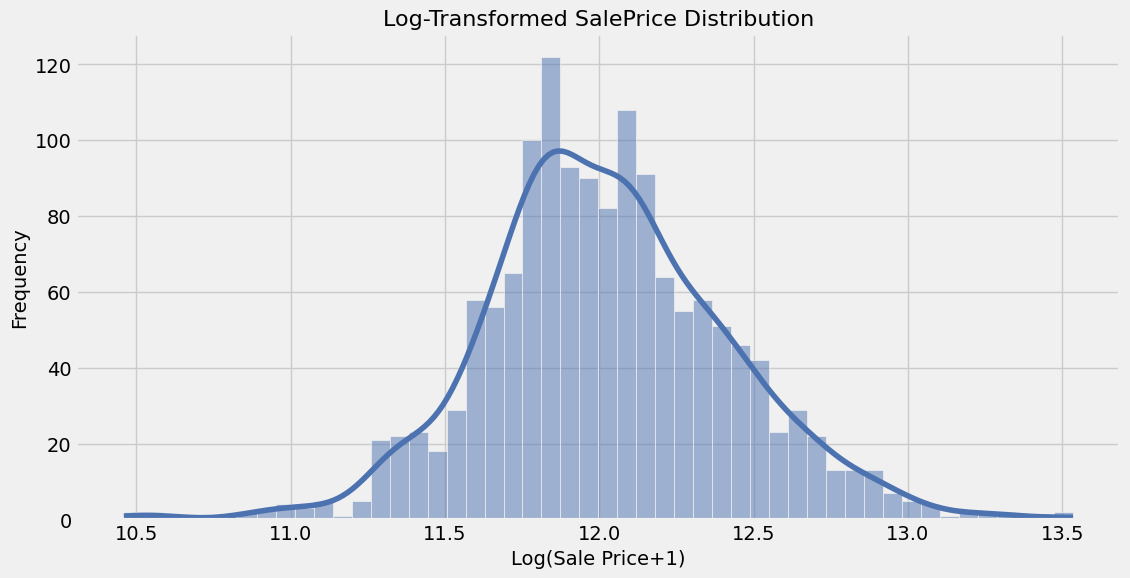

In [11]:
# log transformation to make the distribution more normal
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(train['SalePrice']), kde=True, bins=50)
plt.title('Log-Transformed SalePrice Distribution', fontsize=16)
plt.xlabel('Log(Sale Price+1)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

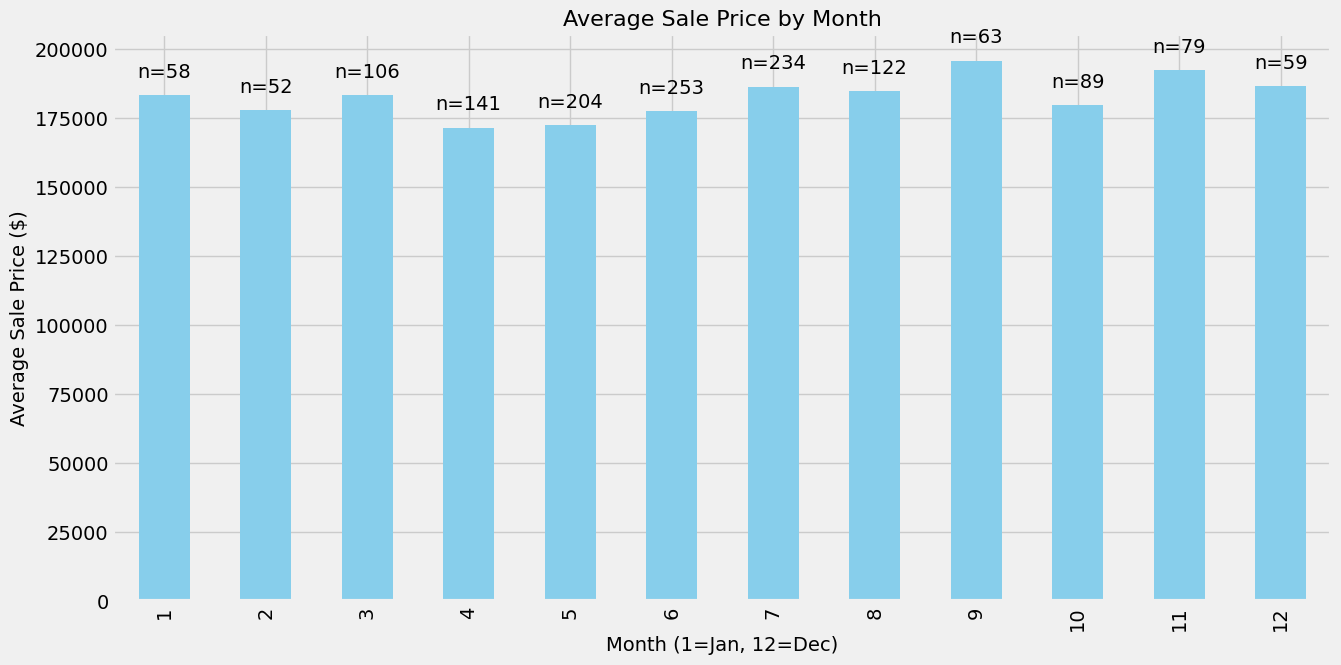

In [13]:
# seasonal patterns
monthly_sales = train.groupby('MoSold')['SalePrice'].agg(['mean', 'median', 'count'])

plt.figure(figsize=(14, 7))
ax = monthly_sales['mean'].plot(kind='bar', color='skyblue')
ax.set_xlabel('Month (1=Jan, 12=Dec)', fontsize=14)
ax.set_ylabel('Average Sale Price ($)', fontsize=14)
ax.set_title('Average Sale Price by Month', fontsize=16)

# add count annotations
for i, count in enumerate(monthly_sales['count']):
  ax.annotate(f'n={count}', xy=(i, monthly_sales['mean'][i+1]),
              xytext=(0, 10), textcoords='offset points',
              ha='center', va='bottom')

plt.show()

## Correlation Analysis

In [15]:
# calculate correlations
numeric_data = train.select_dtypes(include=[np.number])
correlations = numeric_data.corr()

In [16]:
# top 15 features correlated with SalePrice
top_corr = correlations['SalePrice'].sort_values(ascending=False).head(16)
print("Top 15 features correlated with SalePrice:")
print(top_corr[1:])

Top 15 features correlated with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
Name: SalePrice, dtype: float64


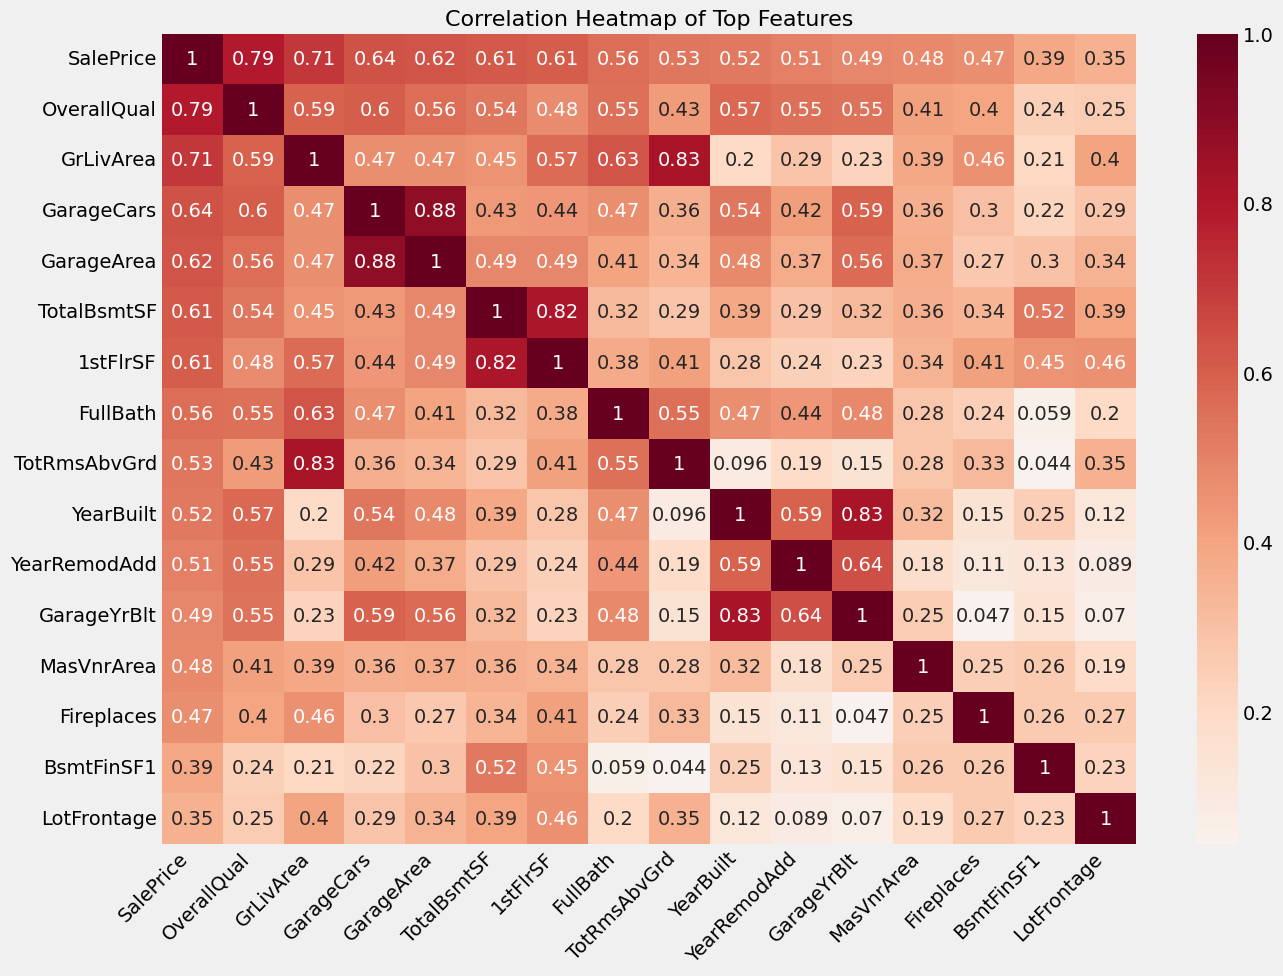

In [17]:
# heatmap of top correlations
plt.figure(figsize=(14, 10))
features = top_corr.index.tolist()
sns.heatmap(train[features].corr(), annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap of Top Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

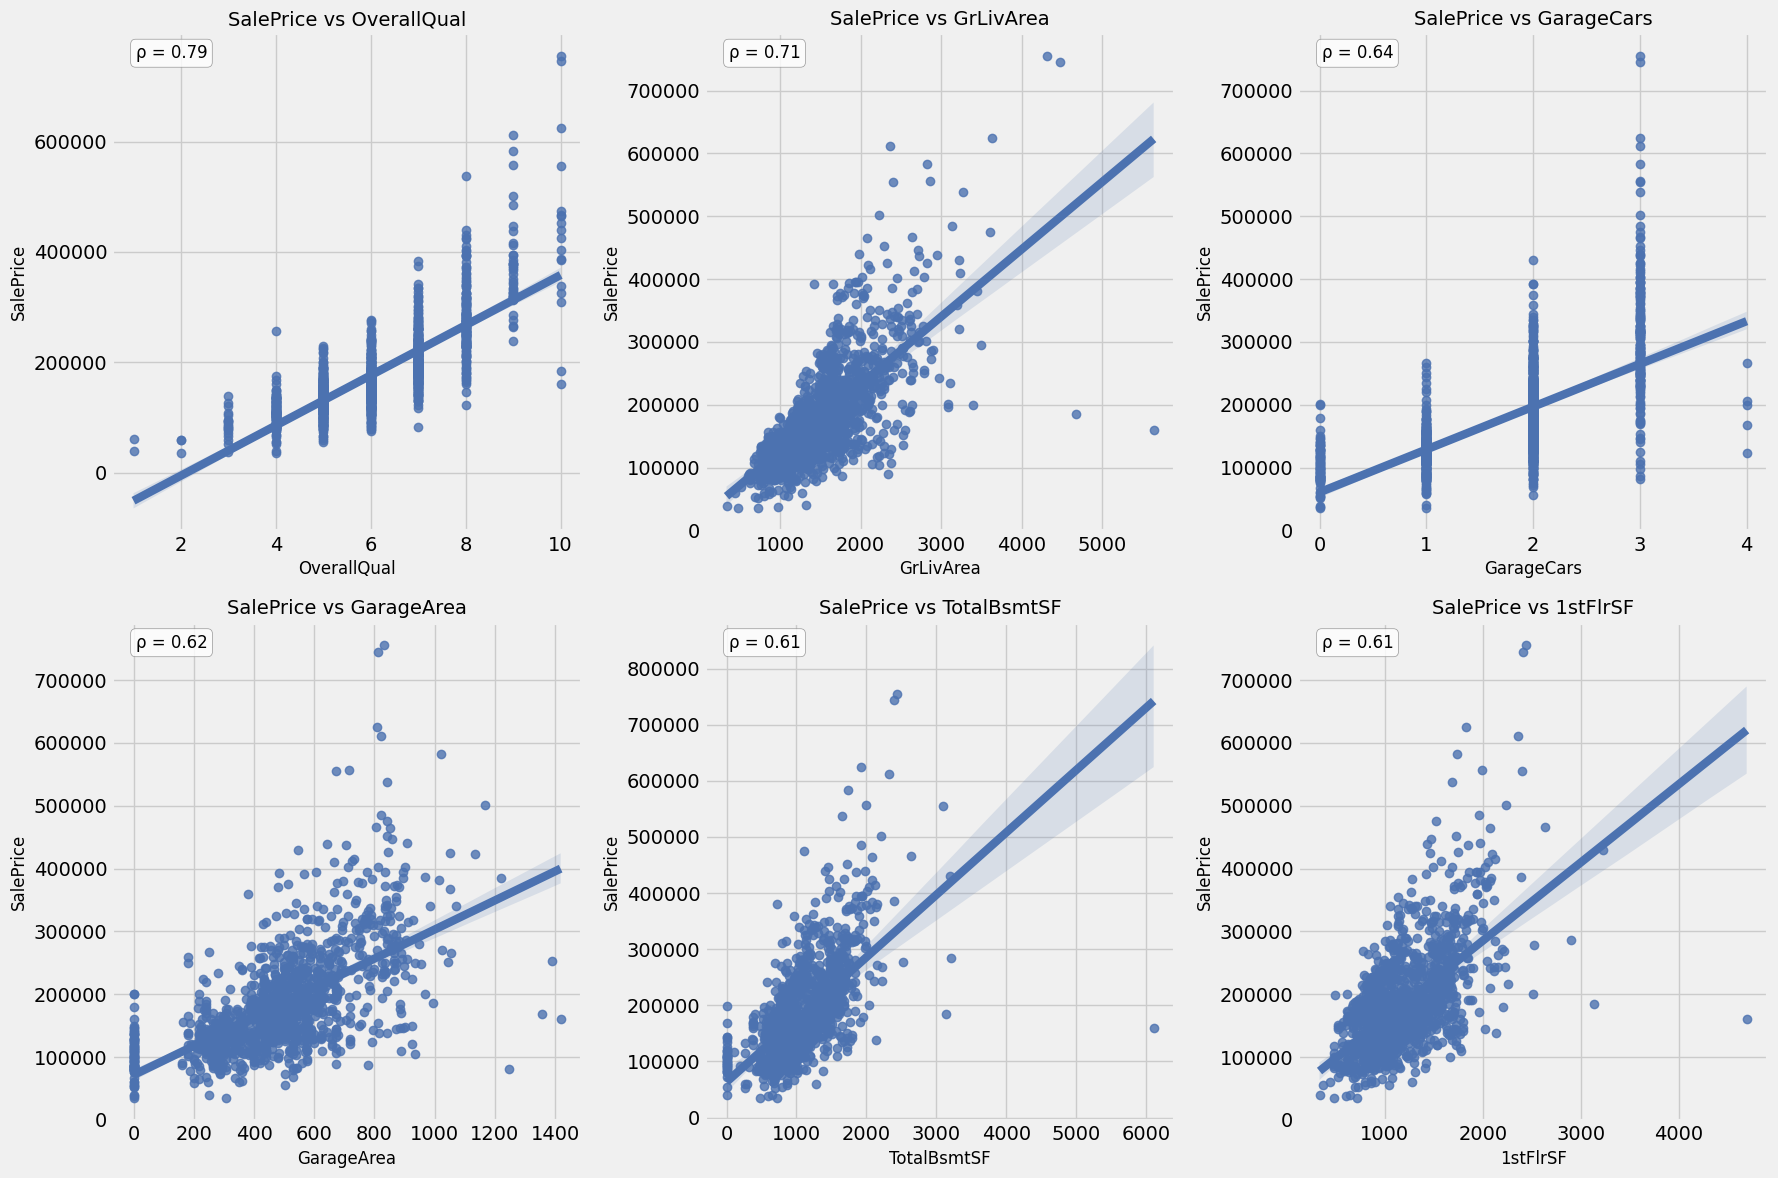

In [19]:
# scatterplots of top 6 features vs SalePrice
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(top_corr[1:7].index):
  sns.regplot(x=feature, y='SalePrice', data=train, ax=axes[i])
  axes[i].set_title(f'SalePrice vs {feature}', fontsize=14)
  axes[i].set_xlabel(feature, fontsize=12)
  axes[i].set_ylabel('SalePrice', fontsize=12)

  # add correlation coefficient
  correlation = train[[feature, 'SalePrice']].corr().iloc[0, 1]
  axes[i].annotate(f'ρ = {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                   fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

## Missing Value Analysis

In [20]:
# calculate missing values
missing_train = pd.DataFrame(train.isnull().sum(), columns=['Missing Values'])
missing_train['Percentage'] = missing_train['Missing Values'] / len(train) * 100
missing_train = missing_train[missing_train['Missing Values'] > 0].sort_values('Percentage', ascending=False)

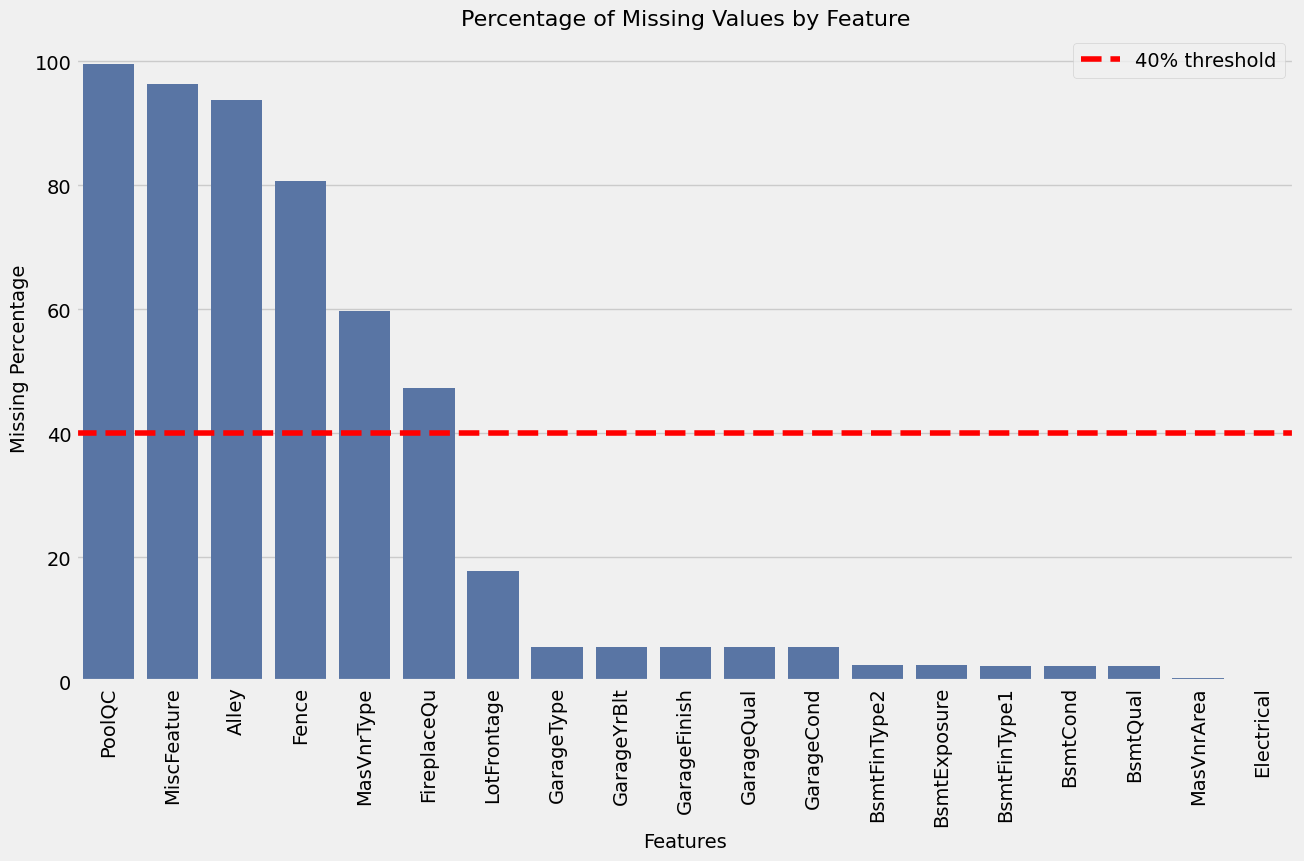

In [21]:
# visualize missing values
plt.figure(figsize=(14, 8))
sns.barplot(x=missing_train.index, y='Percentage', data=missing_train)
plt.title('Percentage of Missing Values by Feature', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Missing Percentage', fontsize=14)
plt.axhline(y=40, color='r', linestyle='--', label='40% threshold')
plt.legend()
plt.show()

In [22]:
# missing value correlations
missing_matrix = train.isnull().astype(int)
missing_corr = missing_matrix.corr()

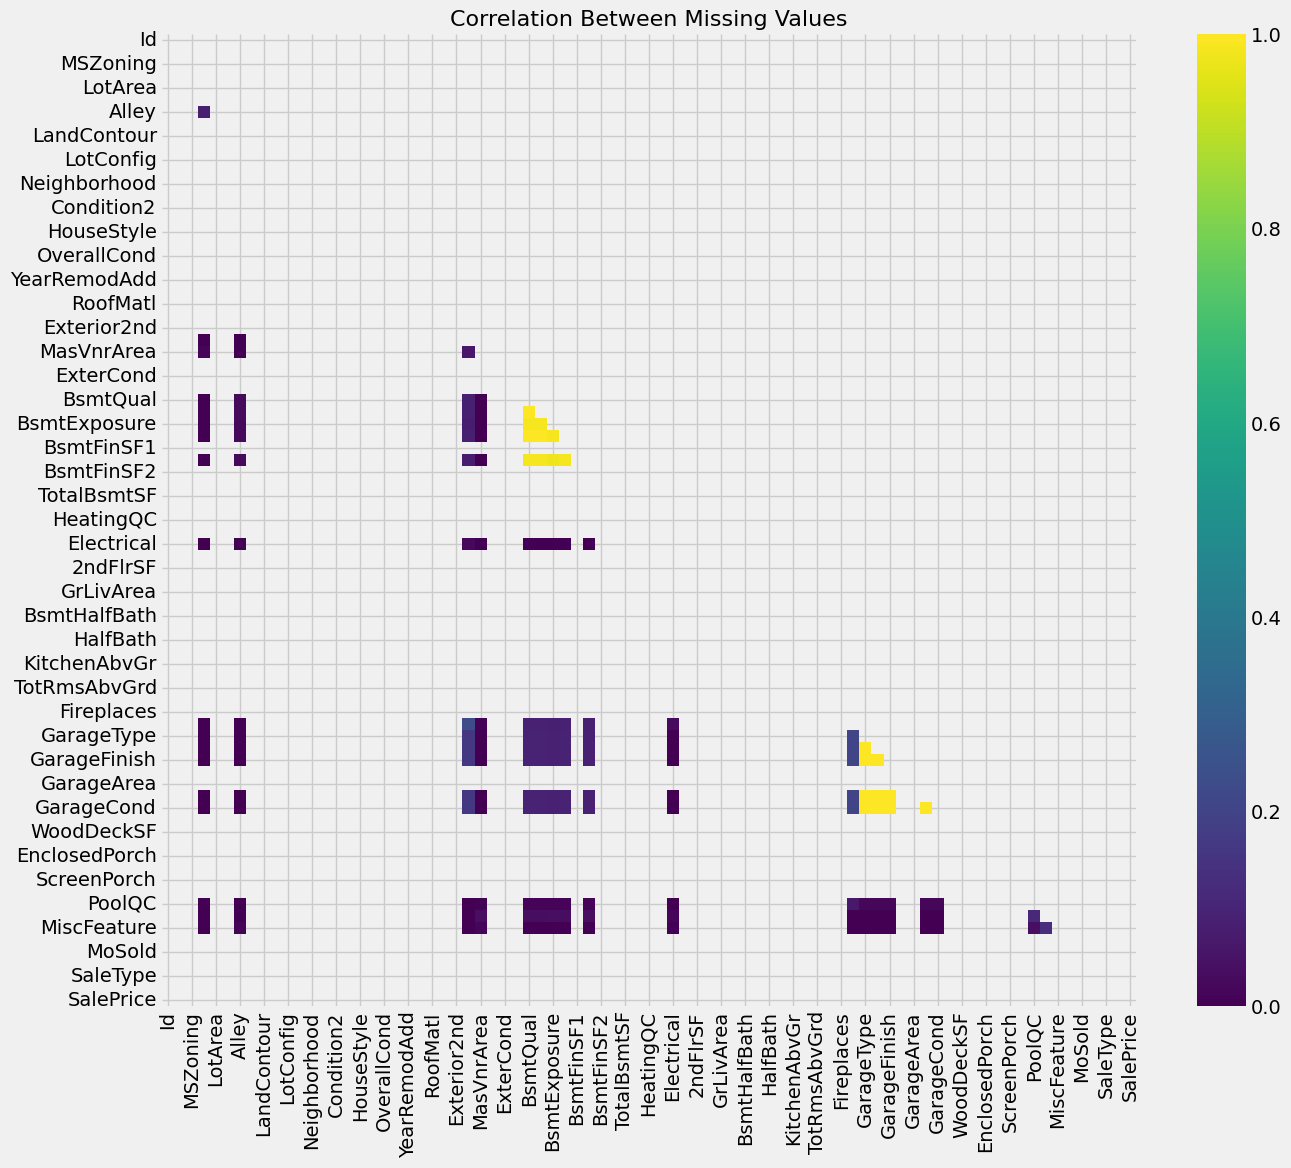

In [23]:
# visualize missing correlations
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(missing_corr, dtype=bool))
sns.heatmap(missing_corr, mask=mask, cmap='viridis', annot=False, vmin=0, vmax=1)
plt.title('Correlation Between Missing Values', fontsize=16)
plt.show()

In [24]:
# create a profile of houses with missing values for key features
important_features = ['GarageType', 'GarageFinish', 'GarageQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure']
for feature in important_features:
  if feature in train.columns:
    missing_group = train[train[feature].isnull()]
    non_missing_group = train[~train[feature].isnull()]

    print(f"Profile of houses with missing {feature}:")
    print(f"Count: {len(missing_group)} ({len(missing_group)/len(train)*100:.2f}%)")
    print(f"Average Sale Price: ${missing_group['SalePrice'].mean():.2f} (vs ${non_missing_group['SalePrice'].mean():.2f})")

Profile of houses with missing GarageType:
Count: 81 (5.55%)
Average Sale Price: $103317.28 (vs $185479.51)
Profile of houses with missing GarageFinish:
Count: 81 (5.55%)
Average Sale Price: $103317.28 (vs $185479.51)
Profile of houses with missing GarageQual:
Count: 81 (5.55%)
Average Sale Price: $103317.28 (vs $185479.51)
Profile of houses with missing BsmtQual:
Count: 37 (2.53%)
Average Sale Price: $105652.89 (vs $182878.28)
Profile of houses with missing BsmtCond:
Count: 37 (2.53%)
Average Sale Price: $105652.89 (vs $182878.28)
Profile of houses with missing BsmtExposure:
Count: 38 (2.60%)
Average Sale Price: $107938.34 (vs $182871.51)


## Outlier Direction

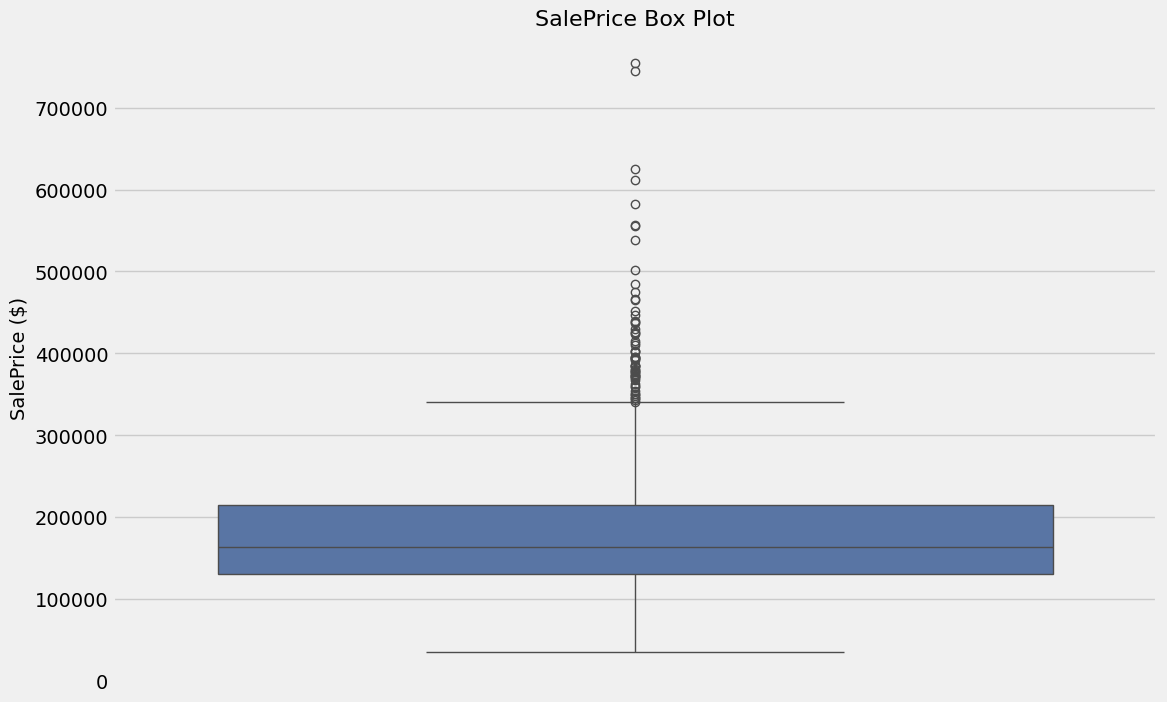

In [25]:
# box plot for numerica features
plt.figure(figsize=(12, 8))
sns.boxplot(y='SalePrice', data=train)
plt.title('SalePrice Box Plot', fontsize=16)
plt.ylabel('SalePrice ($)', fontsize=14)
plt.show()

In [27]:
# indentify outliers using IQR method
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['SalePrice'] < lower_bound) | (train['SalePrice'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")
print("Outlier indices", outliers.index.tolist())

Number of outliers detected: 61
Outlier indices [11, 53, 58, 112, 151, 161, 178, 185, 224, 231, 278, 309, 313, 320, 321, 336, 349, 378, 389, 440, 473, 477, 481, 496, 515, 527, 585, 591, 608, 642, 644, 654, 661, 664, 678, 688, 691, 702, 718, 769, 774, 798, 803, 825, 877, 898, 987, 990, 1046, 1142, 1169, 1181, 1182, 1228, 1243, 1267, 1268, 1353, 1373, 1388, 1437]


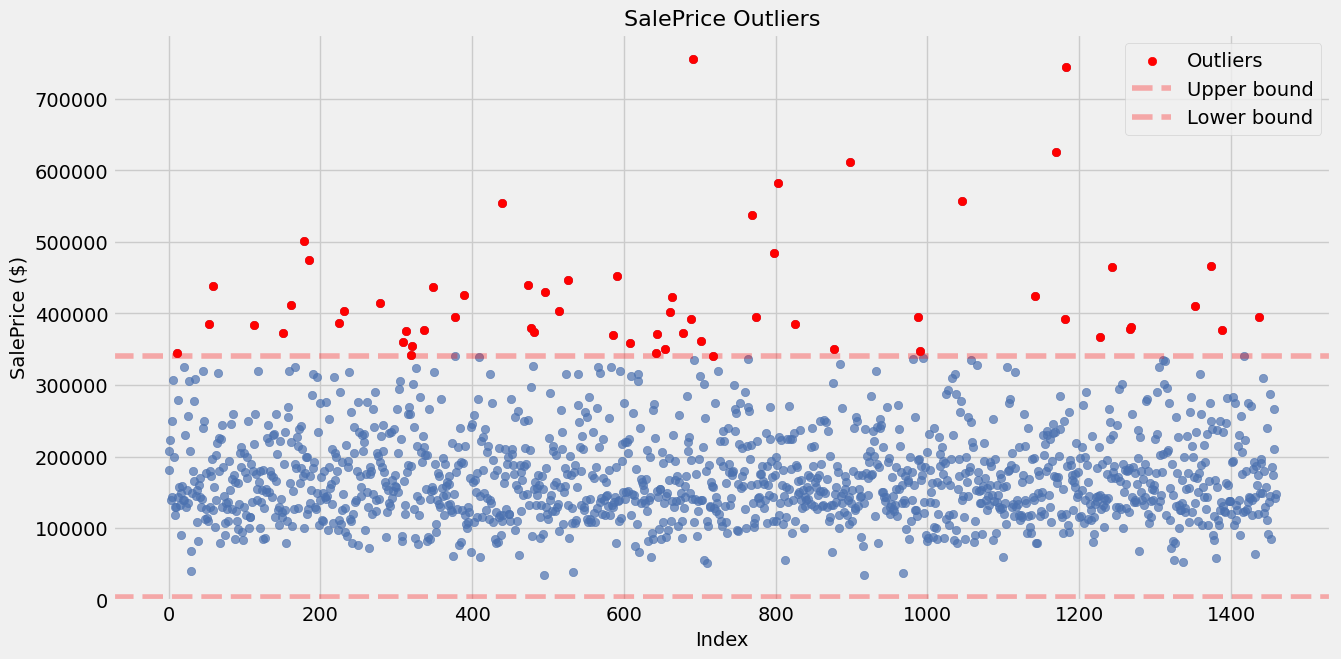

In [28]:
# visualize potential outliers
plt.figure(figsize=(14, 7))
plt.scatter(train.index, train['SalePrice'], alpha=0.7)
plt.scatter(outliers.index, outliers['SalePrice'], color='red', label='Outliers')
plt.axhline(y=upper_bound, color='r', linestyle='--', alpha=0.3, label='Upper bound')
plt.axhline(y=lower_bound, color='r', linestyle='--', alpha=0.3, label='Lower bound')
plt.title('SalePrice Outliers', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('SalePrice ($)', fontsize=14)
plt.legend()
plt.show()

In [29]:
# profile the outliers
print("Outlier Properties:")
print(outliers[['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'SalePrice']].describe().T)

Outlier Properties:
             count           mean           std       min       25%       50%  \
OverallQual   61.0       8.754098      0.849622       7.0       8.0       9.0   
GrLivArea     61.0    2456.918033    627.271400    1419.0    2018.0    2364.0   
YearBuilt     61.0    1998.491803     20.308966    1892.0    1997.0    2006.0   
TotalBsmtSF   61.0    1817.836066    454.236656     728.0    1466.0    1856.0   
SalePrice     61.0  425954.180328  89557.255611  341000.0  372500.0  394617.0   

                  75%       max  
OverallQual       9.0      10.0  
GrLivArea      2728.0    4476.0  
YearBuilt      2008.0    2010.0  
TotalBsmtSF    2046.0    3200.0  
SalePrice    440000.0  755000.0  


In [34]:
# look specifically at large houses with low prices
large_houses_low_prices = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)]
print(f"Large houses with low prices (potential outliers): {len(large_houses_low_prices)}")

Large houses with low prices (potential outliers): 2


In [35]:
print(large_houses_low_prices[['Id', 'GrLivArea', 'SalePrice']])

        Id  GrLivArea  SalePrice
523    524       4676     184750
1298  1299       5642     160000


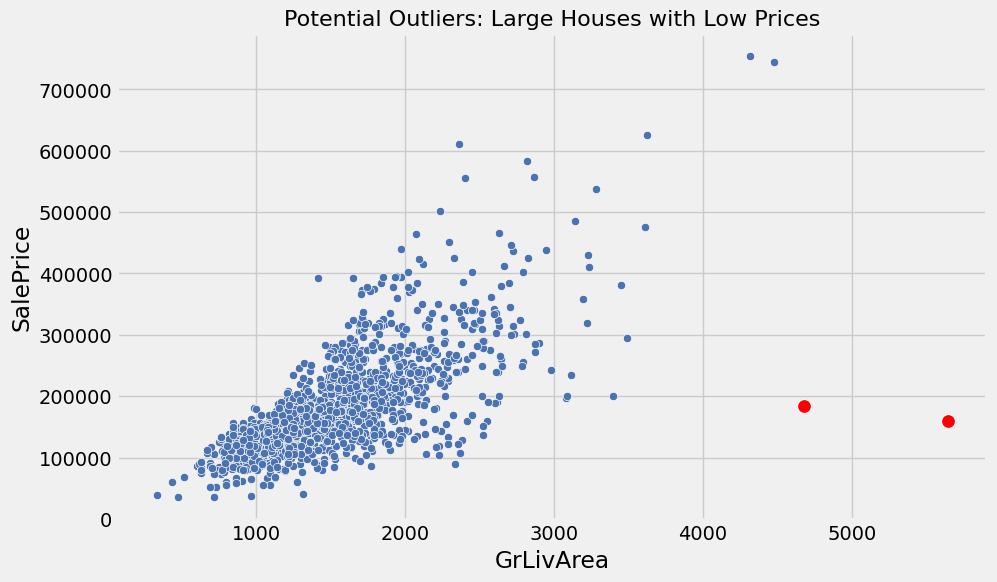

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=large_houses_low_prices, color='red', s=100)
plt.title('Potential Outliers: Large Houses with Low Prices', fontsize=16)
plt.show()

## Feature Group Analysis

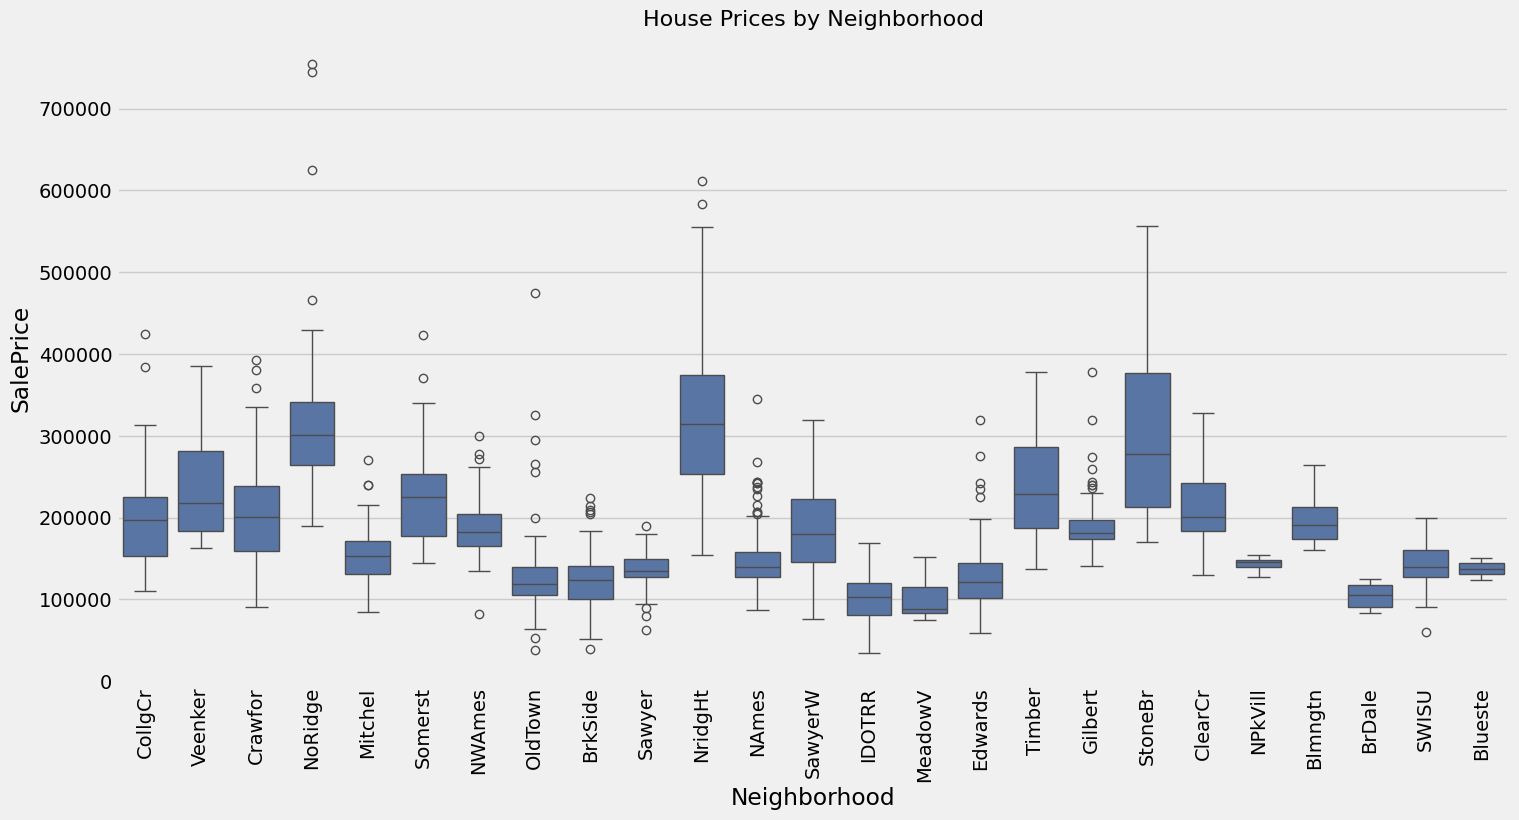

In [33]:
# house prices by neighborhood
plt.figure(figsize=(16, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
plt.title("House Prices by Neighborhood", fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [37]:
# calculate neighborhood statistics
neighborhood_stats = train.groupby('Neighborhood')['SalePrice'].agg(['mean', 'median', 'count', 'std'])
neighborhood_stats = neighborhood_stats.sort_values('mean', ascending=False)
print("Neighborhood price statistics:")
print(neighborhood_stats)

Neighborhood price statistics:
                       mean    median  count            std
Neighborhood                                               
NoRidge       335295.317073  301500.0     41  121412.658640
NridgHt       316270.623377  315000.0     77   96392.544954
StoneBr       310499.000000  278000.0     25  112969.676640
Timber        242247.447368  228475.0     38   64845.651549
Veenker       238772.727273  218000.0     11   72369.317959
Somerst       225379.837209  225500.0     86   56177.555888
ClearCr       212565.428571  200250.0     28   50231.538993
Crawfor       210624.725490  200624.0     51   68866.395472
CollgCr       197965.773333  197200.0    150   51403.666438
Blmngtn       194870.882353  191000.0     17   30393.229219
Gilbert       192854.506329  181000.0     79   35986.779085
NWAmes        189050.068493  182900.0     73   37172.218106
SawyerW       186555.796610  179900.0     59   55651.997820
Mitchel       156270.122449  153500.0     49   36486.625334
NAmes    

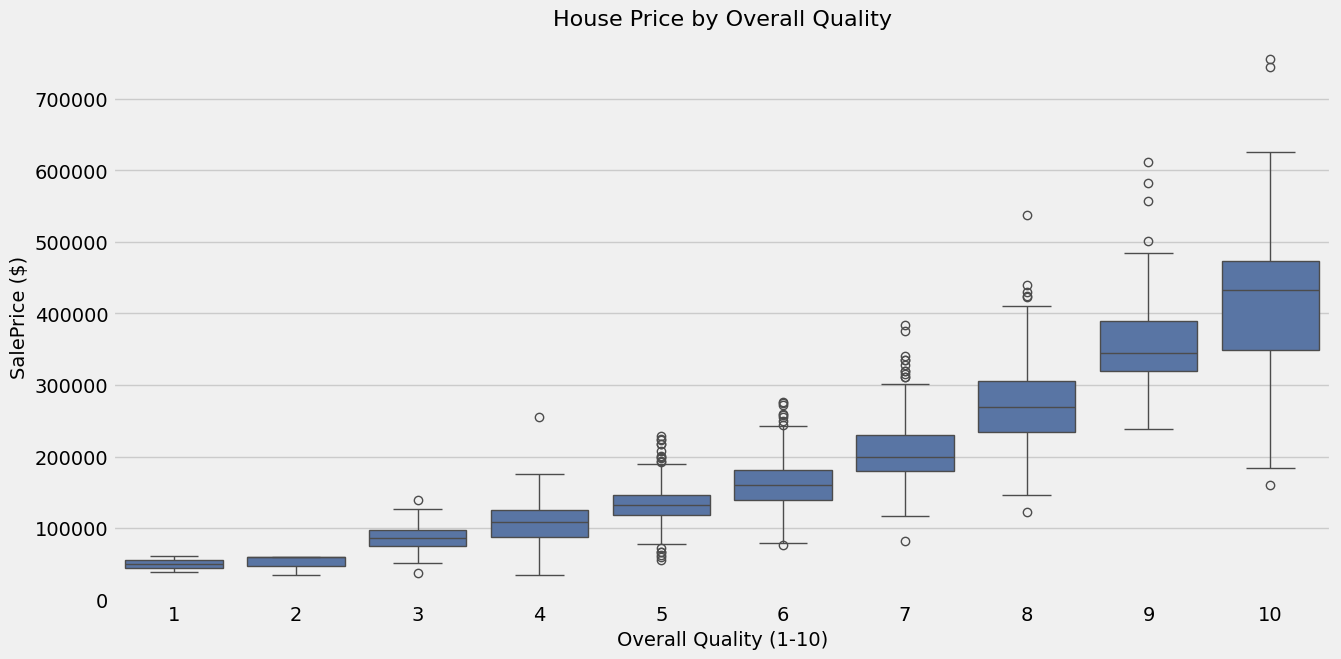

In [38]:
# house quality impact
plt.figure(figsize=(14, 7))
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.title('House Price by Overall Quality', fontsize=16)
plt.xlabel('Overall Quality (1-10)', fontsize=14)
plt.ylabel('SalePrice ($)', fontsize=14)
plt.show()

In [40]:
# calculate and show average price by quality
price_by_quality = train.groupby('OverallQual')['SalePrice'].agg(['mean', 'count', 'min', 'max'])
print("\nPrice by Overall Quality:")
print(price_by_quality)


Price by Overall Quality:
                      mean  count     min     max
OverallQual                                      
1             50150.000000      2   39300   61000
2             51770.333333      3   35311   60000
3             87473.750000     20   37900  139600
4            108420.655172    116   34900  256000
5            133523.347607    397   55993  228950
6            161603.034759    374   76000  277000
7            207716.423197    319   82500  383970
8            274735.535714    168  122000  538000
9            367513.023256     43  239000  611657
10           438588.388889     18  160000  755000


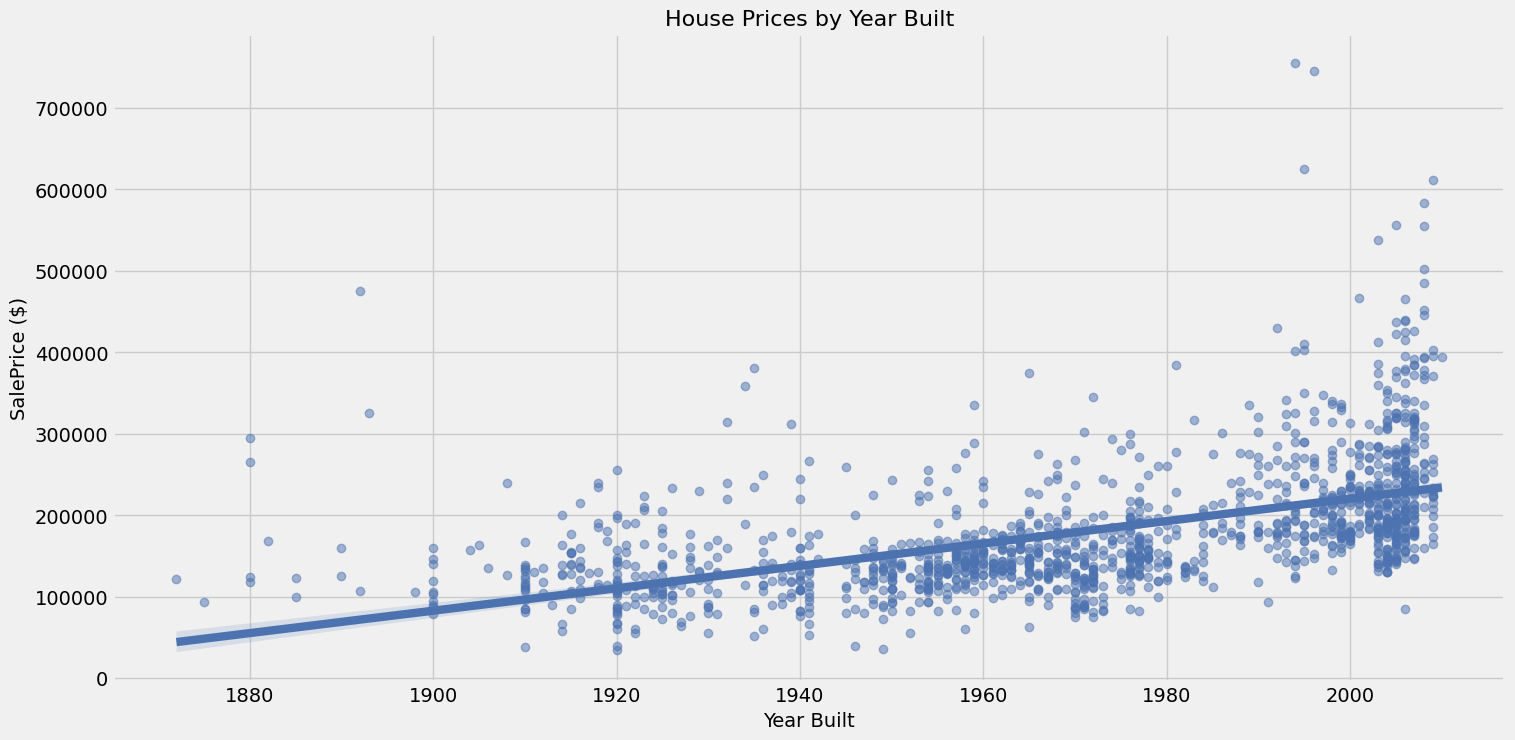

In [41]:
# analyze age effect
plt.figure(figsize=(16, 8))
sns.regplot(x='YearBuilt', y='SalePrice', data=train, scatter_kws={'alpha':0.5})
plt.title('House Prices by Year Built', fontsize=16)
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('SalePrice ($)', fontsize=14)
plt.show()

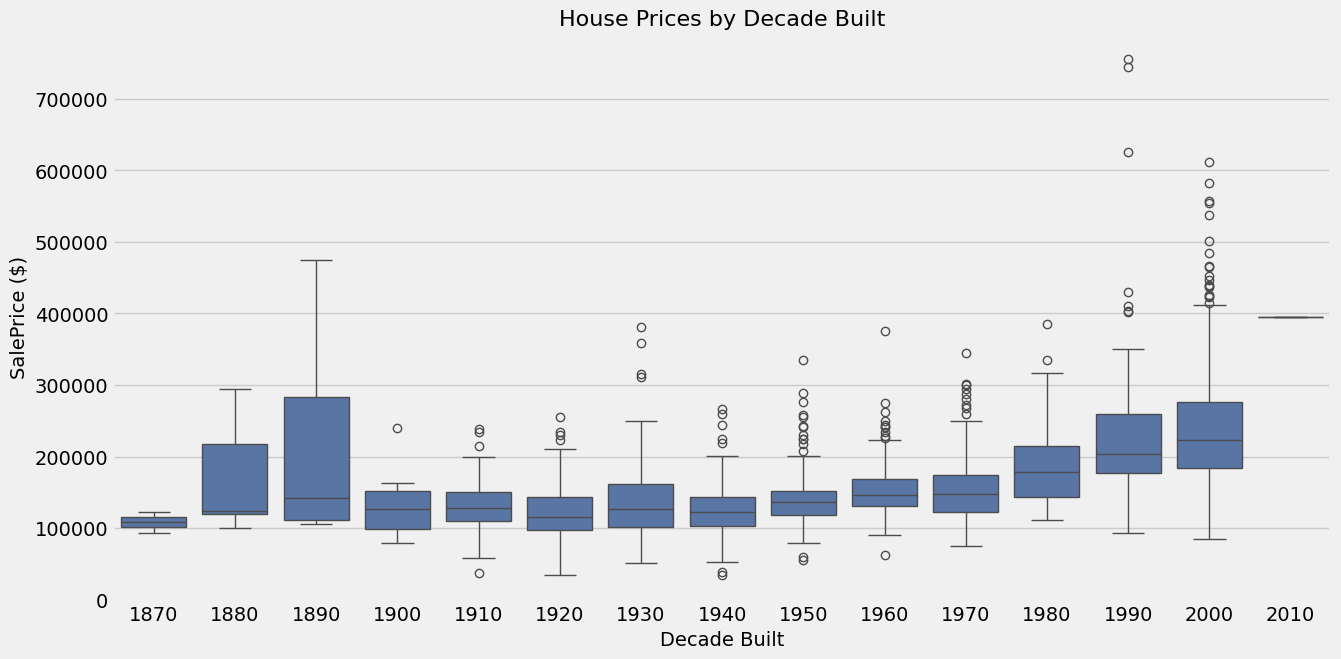

In [42]:
# group by decade
train['Decade'] = (train['YearBuilt'] // 10) * 10
plt.figure(figsize=(14, 7))
sns.boxplot(x='Decade', y='SalePrice', data=train)
plt.title('House Prices by Decade Built', fontsize=16)
plt.xlabel('Decade Built', fontsize=14)
plt.ylabel('SalePrice ($)', fontsize=14)
plt.show()

In [43]:
# remove the decade column to keep the dataset clean
train = train.drop('Decade', axis=1)

## Bivariate Exploration of Selected Features

In [44]:
# visualize relationships between interesting features and price
feature_pairs = [
    ('GrLivArea', 'SalePrice', 'Above Ground Living Area'),
    ('TotalBsmtSF', 'SalePrice', 'Total Basement Area'),
    ('LotArea', 'SalePrice', 'Lot Size'),
    ('YearBuilt', 'SalePrice', 'Year Built'),
    ('GarageArea', 'SalePrice', 'Garage Area'),
    ('FullBath', 'SalePrice', 'Number of Full Bathrooms')
]

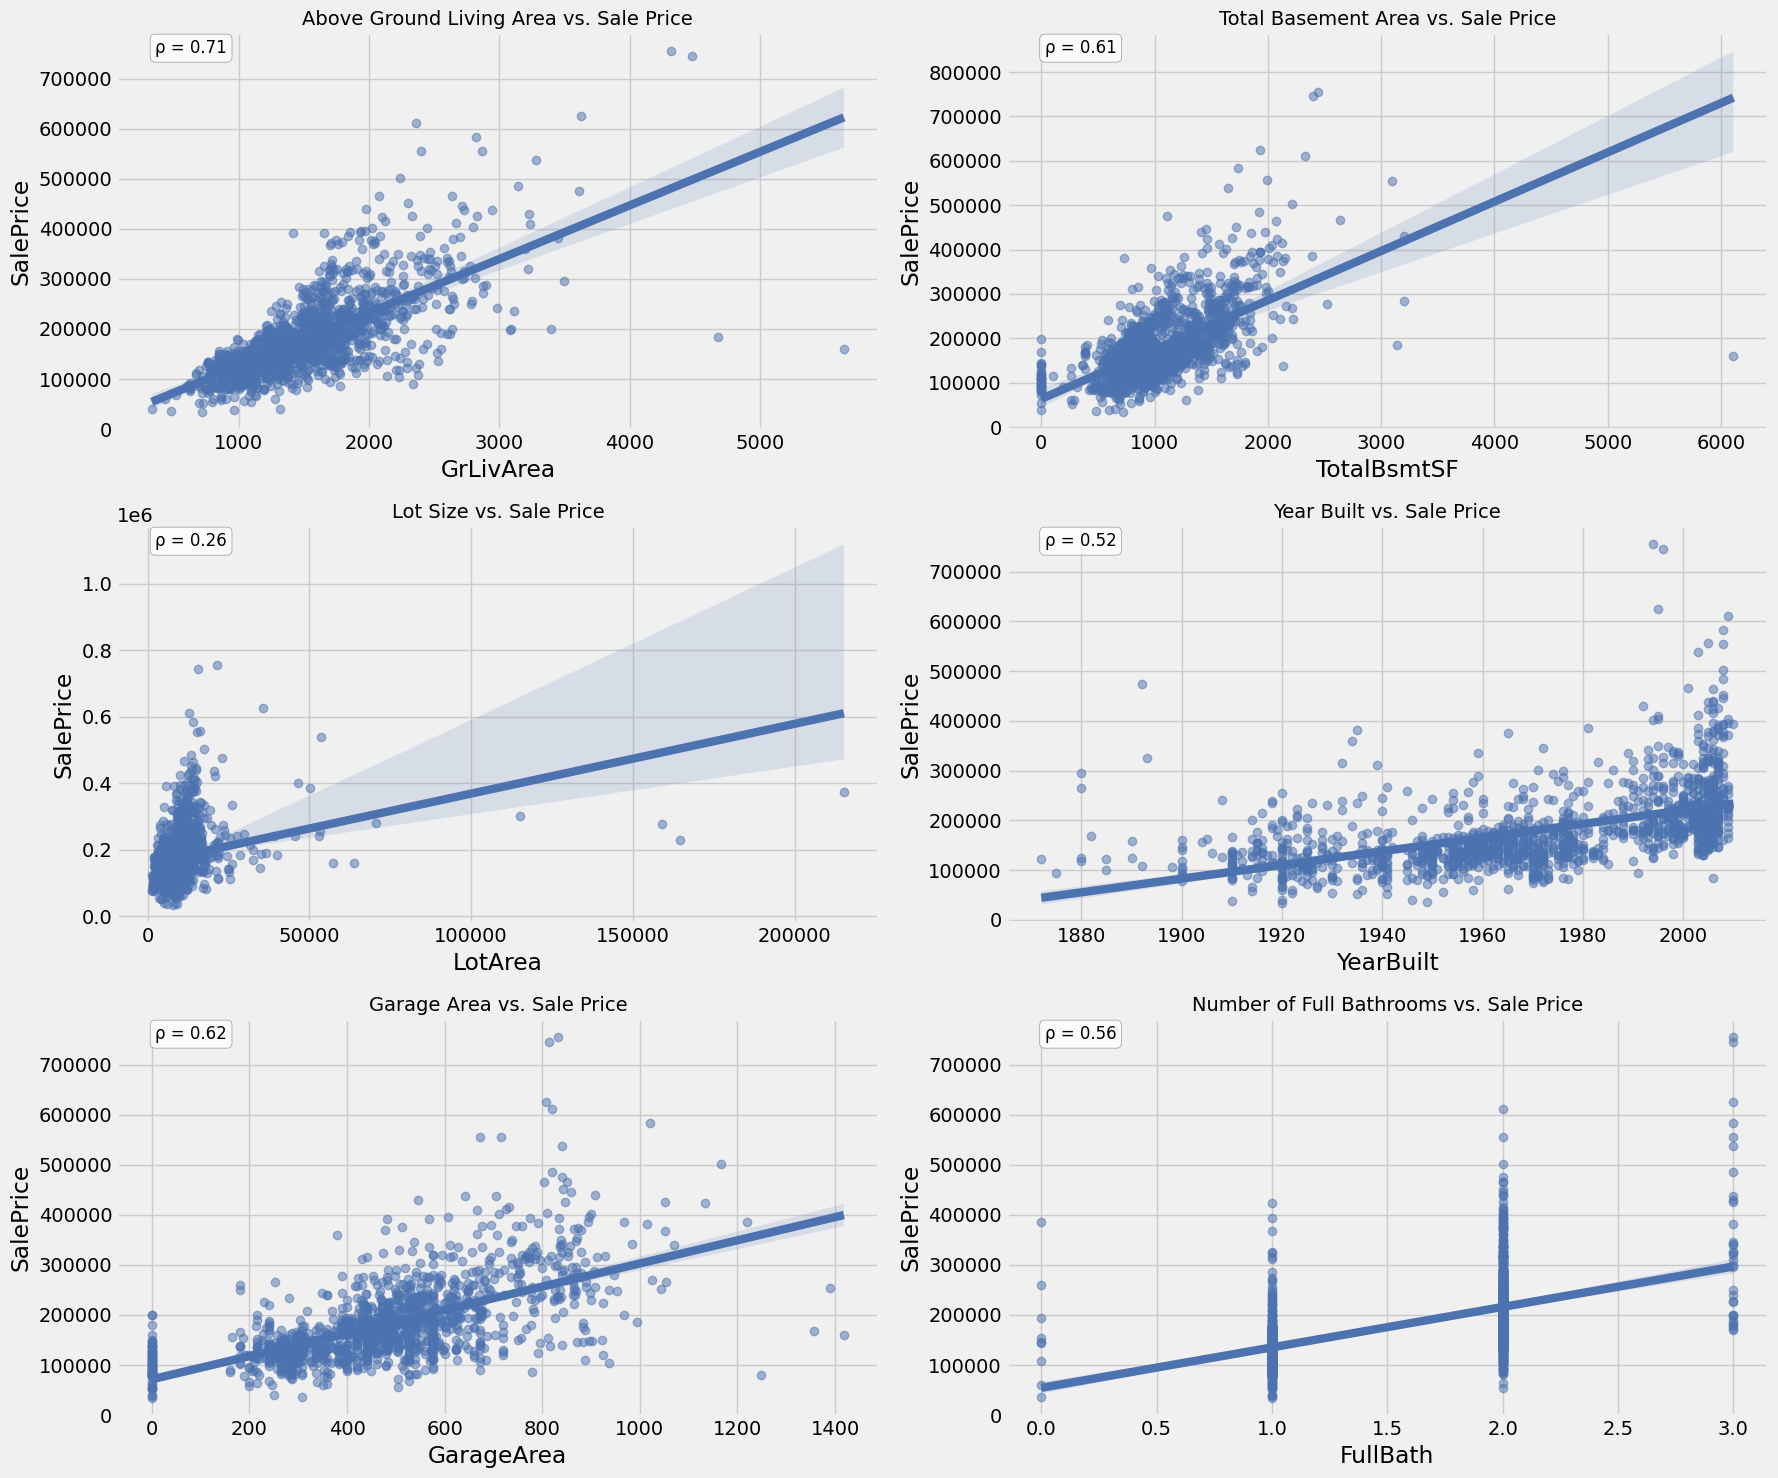

In [45]:
# create scatter plots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

for i, (x, y, title) in enumerate(feature_pairs):
  sns.regplot(x=x, y=y, data=train, ax=axes[i], scatter_kws={'alpha':0.5})
  axes[i].set_title(f'{title} vs. Sale Price', fontsize=14)

  # calculate correlation
  correlation = train[[x, y]].corr().iloc[0, 1]
  axes[i].annotate(f'ρ = {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                        fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

## Save Outlier Indices for Later Use

In [ ]:
# save indices of outliers to be handled in feature engineering
outlier_indices = []

# large houses with low prices
large_houses_indices = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index.tolist()
outlier_indices.extend(large_houses_indices)

# save outlier indices to a file for later use
import json
with open('/data/outlier_indices.json', 'w') as f:
    json.dump({'outlier_indices': outlier_indices}, f)

print(f"Saved {len(outlier_indices)} outlier indices for later processing.")

Saved 2 outlier indices for later processing.


## EDA Summary

1. The target variable (SalePrice) is right-skewed and will benefit from log transformation
2. Top correlating features with SalePrice include: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF
3. There are several features with missing values, particularly related to basements and garages
4. Missing values in certain features (like GarageType, BsmtQual) indicate absence of the feature, not missing data
5. We identified potential outliers, especially large houses with unusually low prices
6. Neighborhood has a significant impact on house prices
7. Overall quality rating shows a strong positive correlation with price
8. Newer houses tend to sell for higher prices